# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [2]:
import pandas as pd

In [4]:
# 학습/평가 데이터 로딩
x_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv')
x_test = pd.read_csv('test_x.csv')
y_test = pd.read_csv('test_y.csv')

In [5]:
x_train

,TRP,year,month,day,hour,TRP_day
0,31535.2200,1,1,1,0,31535.2
1,31188.9174,1,1,1,1,31362.1
2,31240.4974,1,1,1,2,31321.5
3,31442.4314,1,1,1,3,31351.8
4,31922.7751,1,1,1,4,31466.0
...,...,...,...,...,...,...
43507,33060.4555,12,12,31,19,36846.6
43508,32360.1898,12,12,31,20,35833.3
43509,31417.3991,12,12,31,21,34814.8
43510,30763.0563,12,12,31,22,33921.2


In [6]:
y_train

,target
0,30716.3268
1,30673.4813
2,30535.9573
3,30884.0372
4,31353.9409
...,...
43507,33313.8579
43508,33467.1922
43509,31867.1341
43510,31615.5016


---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [11]:
# LinearRegression 모델 학습
LR = LinearRegression()
LR.fit(x_train, y_train)

# 예측 수행
y_pred = LR.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 8757.143058564123
R-squared Score: -5.018412937272836


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 학습
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

# 예측 수행
y_pred = RF.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

C:\Users\user\AppData\Local\Temp\ipykernel_3672\1501328330.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RMSE: 2196.779338143356
R-squared Score: 0.6212697769101843


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

##### RF - feature_importances

In [13]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

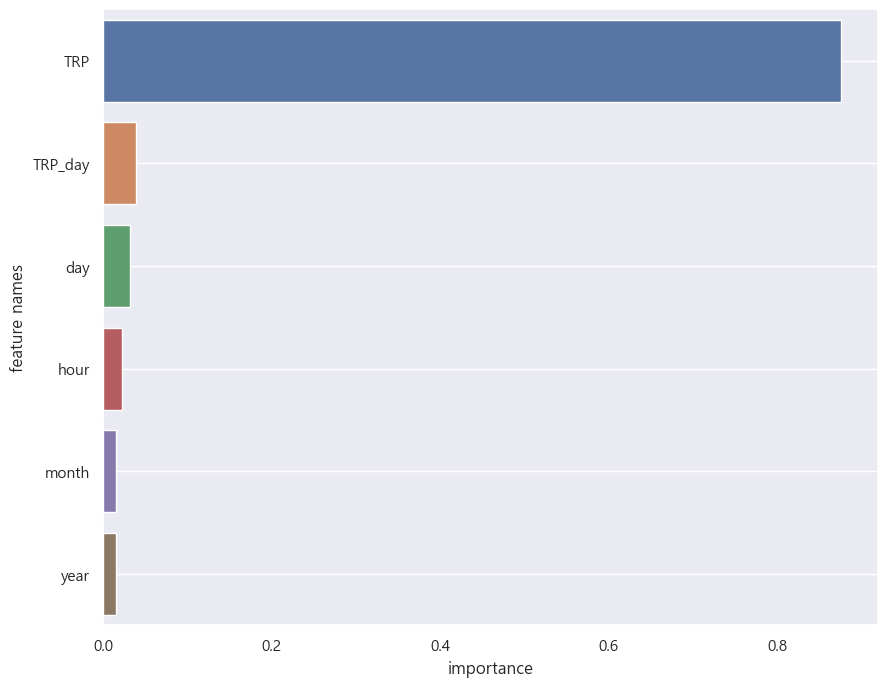

In [15]:
result = plot_feature_importance(RF.feature_importances_, list(x_train))

In [16]:
result

,feature_names,feature_importance
0,TRP,0.875742
1,TRP_day,0.039244
2,day,0.032409
3,hour,0.022743
4,month,0.014966
5,year,0.014896


##### SHAP

In [34]:
!pip install shap

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [33]:
import shap

explainer_rf = shap.TreeExplainer(RF)
shap_values1 = explainer_rf.shap_values(x_train)

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer1.expected_value, shap_values1[0, :], x_train.iloc[0,:])

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [22]:
from xgboost import XGBRegressor, plot_tree, plot_importance

XGB = XGBRegressor(objective='reg:squarederror')
XGB.fit(x_train, y_train)

# 예측 수행
y_pred = XGB.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 2070.756740090754
R-squared Score: 0.6634766057768796


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

##### XGB - feature_importances

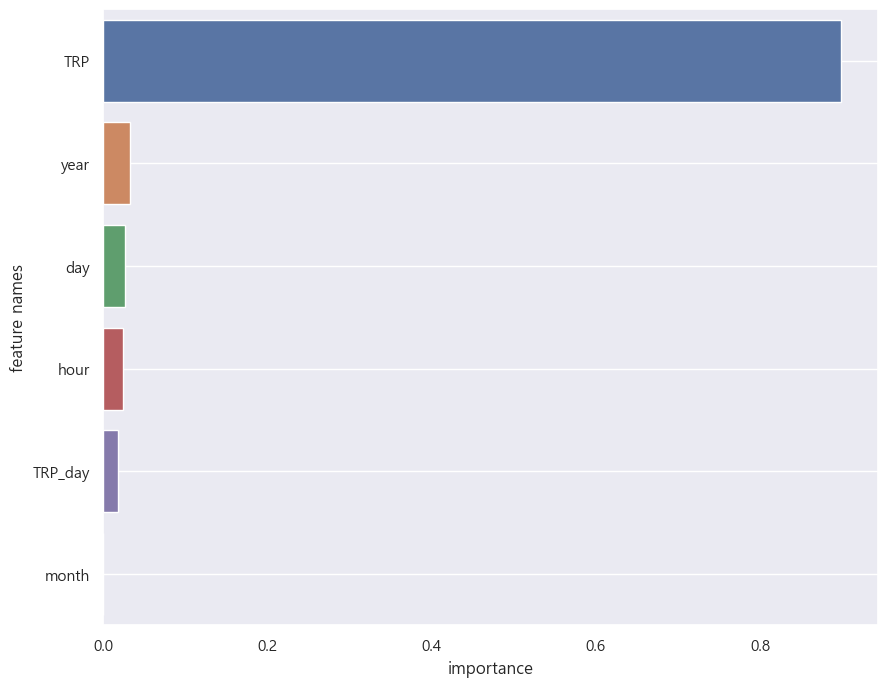

In [25]:
result = plot_feature_importance(XGB.feature_importances_, list(x_train))

In [26]:
result

,feature_names,feature_importance
0,TRP,0.898704
1,year,0.032304
2,day,0.026768
3,hour,0.024429
4,TRP_day,0.017795
5,month,0.000000


In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인




In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



---

# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [ ]:
# 아래에 실습코드를 작성하세요.


In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



In [ ]:
# 아래에 실습코드를 작성하세요.



In [ ]:
# 아래에 실습코드를 작성하세요.


In [ ]:
# 아래에 실습코드를 작성하세요.

